In [50]:
#Decision tree model
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data preparation and processing or manipulation
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting and data visualization
%matplotlib inline
import graphviz # visualization of the test nodes
# ml libraries decision tree
from sklearn import tree
from sklearn.model_selection import train_test_split
# control display| optional
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#DCDCDC"})
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Loading the dataset
df = pd.read_csv('heart_disease.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


cp=chest pain trestbps= resting blood pressure chol= cholestrerol fbs= fasting blood sugar restecg= resting electrocardiography exang=exercise induced agina oldpeak=ST depreesion induced slope= the slope of the peak exercise ca=number of major vessel thal=normal, fixied defect, reversible defect target=have disease or not(1=yes, 0=n0)

In [52]:
# Logistic Regression
# predict one or more possible outcomes(ussually represented as 0 or 1)
# column target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [53]:
# show mean for training data
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


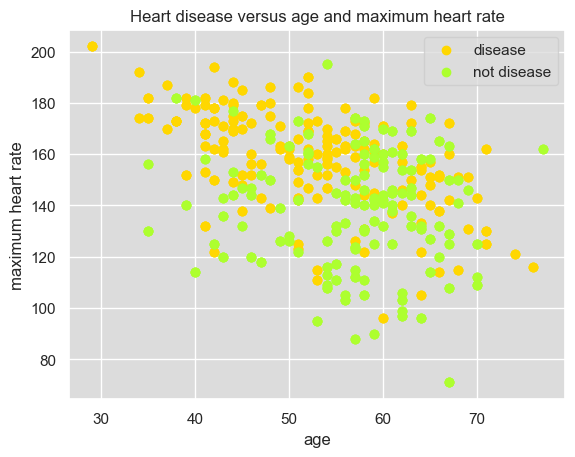

In [54]:
# create a scatter plot for heart disease vs age and maximum heart rate
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='#FFD700',label='disease')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='#ADFF2F',label='not disease')
# add a legend
plt.legend()
# add labels to the axes
plt.xlabel('age')
plt.ylabel('maximum heart rate')
# set the title
plt.title('Heart disease versus age and maximum heart rate')
# show plot
plt.show()


In [67]:
# create a logistic regression
# help tpo solve problems with classification
# create dependent variables and independent variables
y=df.target.values
x_data=df.drop(['target'],axis=1)


In [68]:
#normalize the data
x=(x_data-np.mean(x_data))/(np.max(x_data))-np.mean(x_data)

In [69]:
# split the data for training 80% and testing 20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [70]:
#transpose matrices
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T


In [71]:
# determine the accuracy using logistic regression
# get the test accuracy
from sklearn.linear_model import LogisticRegression

accuracies={}
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc=lr.score(x_test.T,y_test.T)*100
accuracies['LogisticRegression']=acc
# get the output
print('Test accuracy{:.2f}%'.format(acc))

Test accuracy85.85%


In [72]:
# import the KNN classifier
# get accuracy of the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T,y_train.T)
prediction=knn.predict(x_test.T)
#get output
print("{}NN Score:{:.2f}%".format(2,knn.score(x_test.T,y_test.T)*100))

2NN Score:100.00%


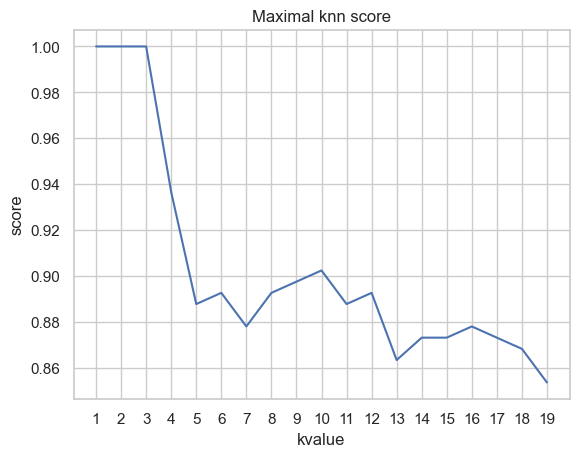

maximum knn score is100.00%


In [73]:
# get the maximum knn score for the model
score_list=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T,y_train.T)
    score_list.append(knn2.score(x_test.T,y_test.T))
# show using the line plot
plt.plot(range(1,20),score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('kvalue')
plt.ylabel('score')
plt.title('Maximal knn score')
plt.show()
# get the maximum knn score for the model in percentage
acc=max(score_list)*100
accuracies['KNN']=acc
print('maximum knn score is{:.2f}%'.format(acc))

In [74]:
# get test accuracy using support vector machine algorithm
from sklearn.svm import SVC 
svm=SVC(random_state=1)
svm.fit(x_train.T,y_train.T)
acc=svm.score(x_train.T,y_train.T)*100
accuracies['SVM']=acc
print('Test accuracy of SVM algorithm:{:.2f}%'.format(acc))

Test accuracy of SVM algorithm:51.10%


In [75]:
 # get accuracy using naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train.T,y_train.T)
acc=nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes']=acc
print('Accuracy of Naive Bayes algorithm:{:.2f}%'.format(acc))

Accuracy of Naive Bayes algorithm:85.37%


In [76]:
# get accuracy using decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train.T,y_train.T)
acc=dtc.score(x_test.T,y_test.T)*100
accuracies['Decision Tree']=acc
print('Accuracy of Decision Tree algorithm:{:.2f}%'.format(acc))

Accuracy of Decision Tree algorithm:100.00%


In [77]:
# get accuracy of random forest classification algorithm
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(x_train.T,y_train.T)
acc=rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest']=acc
print('Accuracy of Random Forest Algorithm:{:.2f}%'.format(acc))


Accuracy of Random Forest Algorithm:100.00%


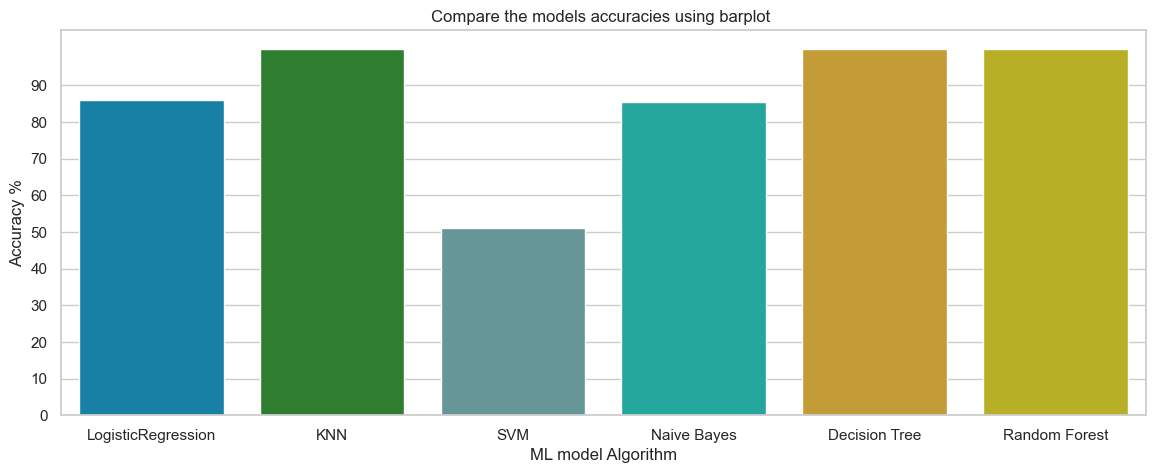

In [79]:
# compare the models accuracies using barplot from sns
colors=['#008BBB','#228B22','#5F9EA0','#0FBBAE','#DAA520','#CFC60E']
sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.title('Compare the models accuracies using barplot ')
plt.ylabel('Accuracy %')
plt.xlabel('ML model Algorithm')
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()), palette=colors)
plt.show()



In [81]:
# confusion matrix
# evaluates the perfomances of classification model
y_head_lr=lr.predict(x_test.T)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T,y_train.T)
y_head_knn=knn3.predict(x_test.T)
y_head_svm=svm.predict(x_test.T)
y_head_nb=nb.predict(x_test.T)
y_head_dtc=dtc.predict(x_test.T)
y_head_rf=rf.predict(x_test.T)



In [84]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_head_lr)
cm_knn=confusion_matrix(y_test,y_head_knn)
cm_svm=confusion_matrix(y_test,y_head_svm)
cm_nb=confusion_matrix(y_test,y_head_nb)
cm_dtc=confusion_matrix(y_test,y_head_dtc)
cm_rf=confusion_matrix(y_test,y_head_rf)


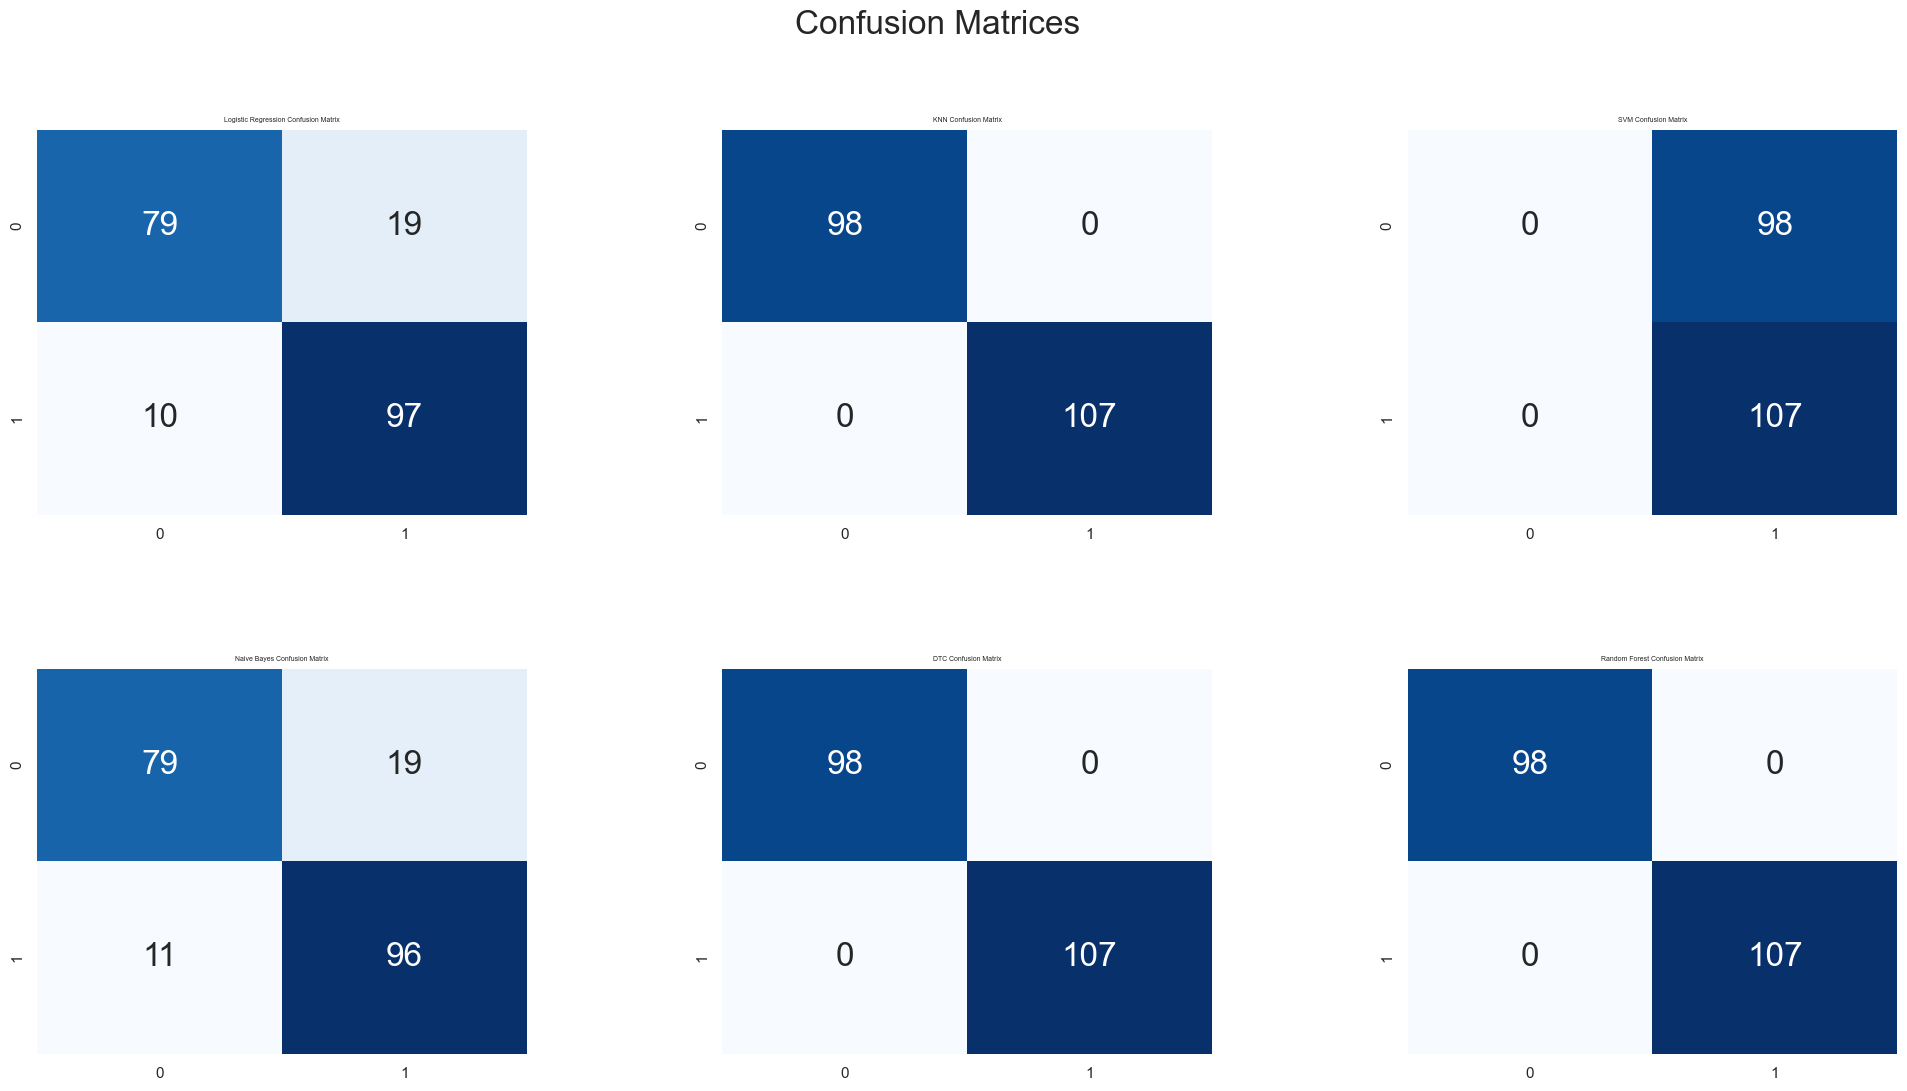

In [96]:
# plotting for heatmap using confusion matrix
plt.figure(figsize=(24,12))
plt.suptitle('Confusion Matrices',fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(2,3,1)
# heatmap for logistic regression
plt.title('Logistic Regression Confusion Matrix',fontsize=5)
sns.heatmap(cm_lr,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for KNN
plt.subplot(2,3,2)
plt.title('KNN Confusion Matrix',fontsize=5)
sns.heatmap(cm_knn,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for SVM
plt.subplot(2,3,3)
plt.title('SVM Confusion Matrix',fontsize=5)
sns.heatmap(cm_svm,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for Naive Bayes
plt.subplot(2,3,4)
plt.title('Naive Bayes Confusion Matrix',fontsize=5)
sns.heatmap(cm_nb,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for Decision Tree Classifier
plt.subplot(2,3,5)
plt.title('DTC Confusion Matrix',fontsize=5)
sns.heatmap(cm_dtc,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})

# heatmap for Random Forest
plt.subplot(2,3,6)
plt.title('Random Forest Confusion Matrix',fontsize=5)
sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt='d',cbar=False, annot_kws={'size':24})
plt.show()
